# Exploratory Data Analysis: RITA

![Take off](../Images/flight.jpg)

**Dedication:**

I dedicate this to my inability to properly make visualizations advanced visualizations during a pro bono data analysis project in August 2016--When I started living in San Francisco, and I immersing myself in the Data community.

**"It is not the mountain we conquer, but ourselves"**

**-Sir Edmund Hillary**
____

## Table of Contents

1. Introduction

    a. Background
    
    b. Preliminary Thoughts
    
2. Analysis

3. Summary

4. Resources

5. Data Dictionary

6. Design Framework/Planning
___
## Introduction

### Background

We observe the United State flight delays and performance from the [RITA dataset](https://www.transtats.bts.gov/OT_Delay/OT_DelayCa) from late 2006 to early 2010. Certainly most of these flights are within their scheduled operations. However, there is some percentage of flight delays due to some delay condition. [A few reasons for delays](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html#q4) can occur from:

1. **Air Carrier:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).

2. **Extreme Weather:** Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.

3. **National Aviation System (NAS):** Delays and cancellations attributable to the national aviation system that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

4. **Late-arriving aircraft:** A previous flight with same aircraft arrived late, causing the present flight to depart late.

5. **Security:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

However, we observe the existence of new types of delays within 2006-2010. Particulary, can we find a delay or some disruption in flight operations during both the emergence and climax of [The Great Recession](http://www.investopedia.com/terms/g/great-recession.asp)?

### Preliminary Thoughts

For what percentage of flights

1. How have delays varied from late 2006 to 2007?

2. If some delay has abnormally fluctuated, when did it happen?

3. Was this change in delay situations due to some factor during the above time period?

4. Let's consider a "cancelled" flight as a high degree delay. I.e. A delay can be so extreme, it can cancell other flights. Were there any obscure cancellations from late 2006 to 2007.

> Note: 'year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name','arr_cancelled', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'Date'

## Analysis

### Import

We import several libraries for our analysis. The libraries serve as a purpose of creating and modifying data, and therafter quickly create visualizations.


Moreover, we import two flight delay datasets from the Data Cleaning Implemenation found in "Data-Cleaning-Documentation" Folder.

In [1]:
import pandas as pd

from time import time
import random

import matplotlib.pyplot as plt
import string

#### Import Data

In [2]:
def import_data(filepath):
    #Start timer
    t0 = time()
    
    #Import
    dataframe= pd.read_csv(filepath)
    
    
    #Remove Unnamed:0 column w/ random index record
    cols = list(dataframe.columns)[1:]
    dataframe = dataframe[cols]
    dataframe=dataframe.reset_index()
    dataframe = dataframe.drop('index',1)
    
    
    #Timer
    print("Load Sample Data time: {} seconds".format(time()-t0))
    
    return(dataframe)

##### Flight Data (By Monthly Proportion) Import

In [3]:
df_flight_propByMonth = import_data('../Data/PreparedData/flight_data_byMonth.csv')
#Sort Dataframe by months
df_flight_propByMonth = df_flight_propByMonth.sort_values("month")
df_flight_propByMonth.head(1)

Load Sample Data time: 0.018517732620239258 seconds


,arr_delay_prop_by_month,carrier_delay_prop_by_month,weather_delay_prop_by_month,nas_delay_prop_by_month,security_delay_prop_by_month,late_aircraft_delay_prop_by_month,arr_flights_prop_by_month,arr_del15_prop_by_month,carrier_ct_prop_by_month,weather_ct_prop_by_month,nas_ct_prop_by_month,security_ct_prop_by_month,late_aircraft_ct_prop_by_month,arr_cancelled_prop_by_month,arr_diverted_prop_by_month,month
1,50.0,14.330502,2.912371,14.68466,0.094874,17.977592,68.632579,14.788186,4.111925,0.621391,5.279161,0.039239,4.736468,1.633396,0.157655,1


##### Flight Data (By Yearly Proportion) Import

In [14]:
df_flight_propByYear = import_data('../Data/PreparedData/flight_data_byYear.csv')
df_flight_propByYear.head(5)

Load Sample Data time: 0.005002021789550781 seconds


,arr_delay_prop_by_year,carrier_delay_prop_by_year,weather_delay_prop_by_year,nas_delay_prop_by_year,security_delay_prop_by_year,late_aircraft_delay_prop_by_year,arr_flights_prop_by_year,arr_del15_prop_by_year,carrier_ct_prop_by_year,weather_ct_prop_by_year,nas_ct_prop_by_year,security_ct_prop_by_year,late_aircraft_ct_prop_by_year,arr_cancelled_prop_by_year,arr_diverted_prop_by_year,year
0,50.0,13.909920,2.783581,14.687226,0.126952,18.492322,67.946369,15.369794,4.355547,0.633026,5.292615,0.056167,5.032444,1.160048,0.153989,2006
1,50.0,14.275670,2.845172,13.969826,0.087627,18.821704,66.320811,16.047921,4.631022,0.643213,5.321865,0.043940,5.407890,1.430493,0.152844,2007
2,50.0,13.878563,2.674183,15.103940,0.065973,18.277341,68.629390,14.928106,4.029829,0.554535,5.383483,0.031862,4.928411,1.345516,0.168869,2008
3,50.0,14.018509,2.492490,15.317048,0.059711,18.112242,71.735997,13.549043,3.600465,0.465598,5.011791,0.025890,4.445317,0.993940,0.171959,2009
4,50.0,15.189903,2.201488,12.827822,0.084899,19.695889,72.240991,13.158659,3.797734,0.401564,4.218096,0.034247,4.707039,1.268362,0.173308,2010


We observe both files have successfully imported in less than 1 second.

### Data Attributes

We quickly take a dip inside this data pond of information.

I.e., we identify the dimension and statistical summary for a quick understanding of what we have acquired.

In [5]:
print("Flight Data, by Month, Shape: ", df_flight_propByMonth.shape)
print("Flight Data, by Year, Shape: ", df_flight_propByYear.shape)

Flight Data, by Month, Shape:  (12, 16)
Flight Data, by Year, Shape:  (5, 16)


Each flight dataset is comprised of the following:

Flight Data, by Month: 12 rows by 16 features. Each row represents a month from January to December, 1-12.

Flight Data, by Year: 5 rows by 16 features. Each row represents a year from 2006-2010.

The following are sample statistics for each dataset.

#### Flight Data, by Yearly Proportion

In [6]:
df_flight_propByYear.describe()

,arr_delay_prop_by_year,carrier_delay_prop_by_year,weather_delay_prop_by_year,nas_delay_prop_by_year,security_delay_prop_by_year,late_aircraft_delay_prop_by_year,arr_flights_prop_by_year,arr_del15_prop_by_year,carrier_ct_prop_by_year,weather_ct_prop_by_year,nas_ct_prop_by_year,security_ct_prop_by_year,late_aircraft_ct_prop_by_year,arr_cancelled_prop_by_year,arr_diverted_prop_by_year,year
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,50.0,14.254513,2.599383,14.381172,0.085032,18.679899,69.374712,14.610705,4.082919,0.539588,5.045570,0.038421,4.904220,1.239672,0.164194,2008.000000
std,0.0,0.545707,0.259655,1.009211,0.026308,0.626861,2.535409,1.222509,0.415829,0.105140,0.484100,0.011862,0.360618,0.169678,0.009977,1.581139
min,50.0,13.878563,2.201488,12.827822,0.059711,18.112242,66.320811,13.158659,3.600465,0.401564,4.218096,0.025890,4.445317,0.993940,0.152844,2006.000000
25%,50.0,13.909920,2.492490,13.969826,0.065973,18.277341,67.946369,13.549043,3.797734,0.465598,5.011791,0.031862,4.707039,1.160048,0.153989,2007.000000
50%,50.0,14.018509,2.674183,14.687226,0.084899,18.492322,68.629390,14.928106,4.029829,0.554535,5.292615,0.034247,4.928411,1.268362,0.168869,2008.000000
75%,50.0,14.275670,2.783581,15.103940,0.087627,18.821704,71.735997,15.369794,4.355547,0.633026,5.321865,0.043940,5.032444,1.345516,0.171959,2009.000000
max,50.0,15.189903,2.845172,15.317048,0.126952,19.695889,72.240991,16.047921,4.631022,0.643213,5.383483,0.056167,5.407890,1.430493,0.173308,2010.000000


We observe flights are typically on time 69.34% of the time. Of flights that are unfortunately delayed, NAS is most likely the cause. If NAS is not the cause of a flight delay, we anticipate it's delay due to logistic concerns, and it will be late by 15mins or so.

#### Flight Data, by Montly Proportion

In [7]:
df_flight_propByMonth.describe()

,arr_delay_prop_by_month,carrier_delay_prop_by_month,weather_delay_prop_by_month,nas_delay_prop_by_month,security_delay_prop_by_month,late_aircraft_delay_prop_by_month,arr_flights_prop_by_month,arr_del15_prop_by_month,carrier_ct_prop_by_month,weather_ct_prop_by_month,nas_ct_prop_by_month,security_ct_prop_by_month,late_aircraft_ct_prop_by_month,arr_cancelled_prop_by_month,arr_diverted_prop_by_month,month
count,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,50.0,14.275114,2.573003,14.550994,0.085790,18.515098,69.361975,14.618817,4.087740,0.540605,5.061804,0.038570,4.890112,1.238756,0.161622,6.500000
std,0.0,0.539654,0.403135,0.852507,0.023536,0.771898,3.509909,1.564258,0.455923,0.134710,0.365782,0.011861,0.704003,0.505166,0.033277,3.605551
min,50.0,13.492031,1.848037,13.391796,0.062254,16.843294,62.946439,11.969338,3.464078,0.333677,4.406045,0.024547,3.666820,0.724390,0.116332,1.000000
25%,50.0,13.981381,2.360627,14.030353,0.069559,18.043791,67.083534,13.773482,3.711479,0.422005,4.855822,0.029401,4.537362,0.895713,0.140698,3.750000
50%,50.0,14.222266,2.511531,14.496704,0.083176,18.546526,69.091129,14.713048,4.144806,0.537935,5.136452,0.037721,4.887414,1.043945,0.154473,6.500000
75%,50.0,14.436918,2.933885,15.252837,0.093653,19.066949,71.370899,15.464572,4.372319,0.648139,5.307269,0.041499,5.223547,1.454306,0.182736,9.250000
max,50.0,15.481939,3.073614,15.757558,0.149616,19.722995,75.002835,17.416003,4.839768,0.720561,5.652246,0.067311,6.152048,2.274009,0.225343,12.000000


In the case of months,

We observe flights are typically on time 69.36% of the time. Of flights that are unfortunately delayed, NAS is most likely the cause. If NAS is not the cause of a flight delay, we anticipate it's delay due to logistic concerns, and it will be late by 15mins or so.


To understand and digest what issue creates a delay, we avoid the delay of deciphering information by text, through a quick visualization...

### Visualization and Analytics

The following contains a case by case analytic exploration. We wil observe some visualization, then explore significant changes over the course of th 2006-2010 timeline.

For each visualization section, we observe the mean and median cases, in black and blue respectively. Thereafter, we observe the total proportinal minutes per some time period, highlighted in red.

Before carry on with this analysis, we produce several functions.

The first function is "title_check." This function allows us to correct mispellings or whitespaces of feature/column names 

In [8]:
def title_check(string_):
    new_string_ls = []
    for i in string_:
        if i=="_":
            new_string_ls.append(" ")
        else:
            new_string_ls.append(i)
    
    
    new_string_str = ""
    for i in new_string_ls:
        new_string_str += i
    
    new_string_final = new_string_str.title()
        
    return new_string_final

The following functions allow us to visually display the required time data we want to observe, by month or year.

In [9]:
'''
Time Analysis Function time_analysis_viz
Input: dataframe df, list of dates timeline, feature we want to observe, and the specified time "year" or "month"
Output: Visualization of mean and median variations
'''
def time_analysis_viz(df,features,specific_time):
    #Edit Title
    feature_edit = title_check(features)
    
    #Visualization
        
    plt.figure(figsize = (12,5))

    for li in range(0, len(features)):
        plt.plot(df[specific_time],df[features[li]])

    ## Labels
    plt.title("Delays over the {}".format(specific_time))
    plt.xlabel("")
    plt.legend(loc = "best")
    plt.show()

#### Flights Status over (Yearly) Time

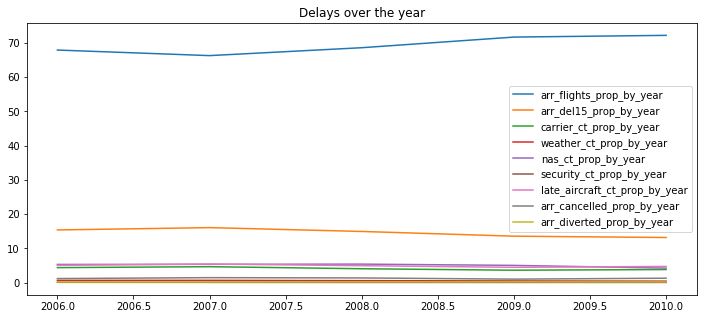

In [10]:
on_time_flights_yrTime = ['arr_flights_prop_by_year', 'arr_del15_prop_by_year',
       'carrier_ct_prop_by_year', 'weather_ct_prop_by_year',
       'nas_ct_prop_by_year', 'security_ct_prop_by_year',
       'late_aircraft_ct_prop_by_year', 'arr_cancelled_prop_by_year',
       'arr_diverted_prop_by_year']
time_analysis_viz(df_flight_propByYear, on_time_flights_yrTime, "year")

We confirm flights are, on average, on-time an estimated 69% of the time. Moreover, we observe 20% of flights are delayed by 15mins or more. 

There appears to be a slight decline with on-time flights from 2006 to 2007. However, some occurence stopped the decline at the end of 2007. Thereafter, there was an increase on on-time flights.

We understand flights are on time 70% of the time. However, we would like to observe the spread of delayed flights in the 5% proportional region and under.

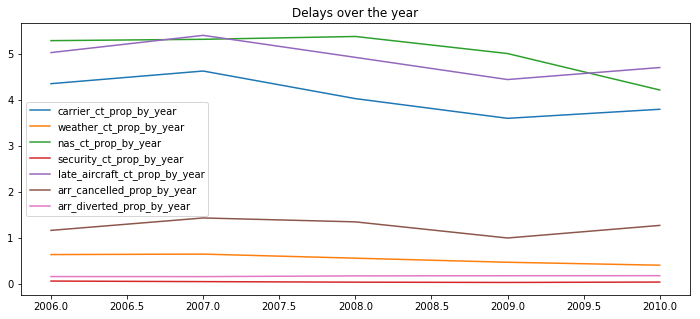

In [11]:
on_time_flights_yrTime2 = [
       'carrier_ct_prop_by_year', 'weather_ct_prop_by_year',
       'nas_ct_prop_by_year', 'security_ct_prop_by_year',
       'late_aircraft_ct_prop_by_year', 'arr_cancelled_prop_by_year',
       'arr_diverted_prop_by_year']
time_analysis_viz(df_flight_propByYear,on_time_flights_yrTime2,"year")

From the steady increase of delayed flights from 2006 to 2007, we observe a significatn decrease of delayed occurences from 2007 and after. However, it appears carrier and late aircraft issues have prevented flights to be sufficiently on time from 2009 and after.

#### Flights Status over (Monthly) Time

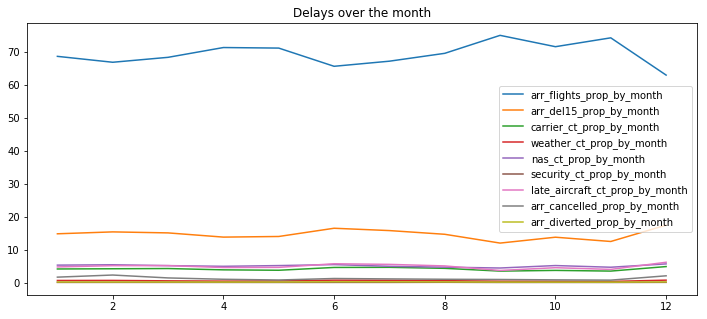

In [12]:
on_time_flights_mnthTime = ['arr_flights_prop_by_month', 'arr_del15_prop_by_month',
       'carrier_ct_prop_by_month', 'weather_ct_prop_by_month',
       'nas_ct_prop_by_month', 'security_ct_prop_by_month',
       'late_aircraft_ct_prop_by_month', 'arr_cancelled_prop_by_month',
       'arr_diverted_prop_by_month']
time_analysis_viz(df_flight_propByMonth, on_time_flights_mnthTime, "month")

We confirm flights are, on average, on-time an estimated 69% of the time. Moreover, we observe around 18% of flights are delayed by 15mins or more. 

There appears to be a slight decline with on-time flights from month May to June. However, some occurence stopped the decline at the end of June. Thereafter, there was an increase on on-time flights. But going into November, index 11, we observe flights tend to have issues.

We understand flights are on time 70% of the time. However, we would like to observe the spread of delayed flights in the 5% proportional region and under.

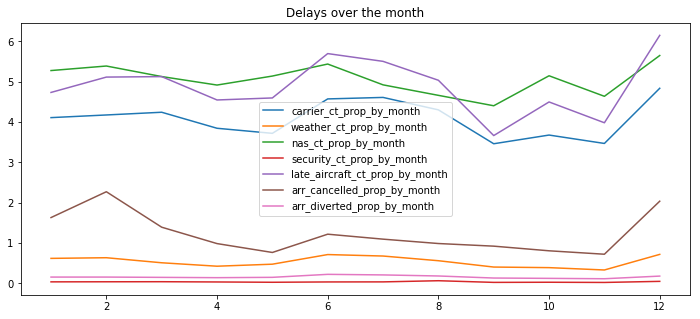

In [13]:
on_time_flights_mnthTime2 = [
       'carrier_ct_prop_by_month', 'weather_ct_prop_by_month',
       'nas_ct_prop_by_month', 'security_ct_prop_by_month',
       'late_aircraft_ct_prop_by_month', 'arr_cancelled_prop_by_month',
       'arr_diverted_prop_by_month']
time_analysis_viz(df_flight_propByMonth, on_time_flights_mnthTime2, "month")

Of delayed flights on a monthly scheme,

We observe decrease in delays from February(2) to May (5). Moreover, a sharp concavity begins and ends during the summer--#VACATION!

Moreover, delays heavily increase from November and after.

## Summary and Takeaways

Summary and Takeways can be found in the index.html presentation

## Resources

1. [Flight Data](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp)

2. [Dimple Basics](http://napitupulu-jon.appspot.com/posts/dimple-ud507.html)

3. [bz2 import](https://pymotw.com/2/bz2/)

4. [Data Dictionary](https://www.transtats.bts.gov/Fields.asp)

5. [Encoding German Codec](https://stackoverflow.com/questions/18197772/python-german-umlaut-issues-ascii-codec-cant-decode-byte-0xe4-in-position-1)

6. [Faster Data Loading through Sampling](http://nikgrozev.com/2015/06/16/fast-and-simple-sampling-in-pandas-when-loading-data-from-files/)

7. [Types of Recorded Delays](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html#q4)

8. [The Great Recession](http://www.investopedia.com/terms/g/great-recession.asp)

9. [EDA Visualization Design/Planning](http://guides.library.georgetown.edu/datavisualization)

10. [How to add a Data Viz Legend](https://stackoverflow.com/questions/28739608/completely-custom-legend-in-matplotlib-python)

11. [Local Server for Python](https://make.wordpress.org/core/handbook/tutorials/installing-a-local-server/)

12. [Local Server, local Web Browser](http://chimera.labs.oreilly.com/books/1230000000345/ch04.html#_terminal_with_python)

13. [Line Graph inDimple.js](http://dimplejs.org/examples_viewer.html?id=lines_horizontal)

14. [How to account for seasonality](http://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/)

## [Data Dictionary](https://www.transtats.bts.gov/Fields.asp)

1. **year:** Year

2. **month:** Month

3. **carrier:** Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.

4. **carrier_name:** Carrier Name

5. **airport:** Airport Code

6. **airport_name:** Airport Name

7. **arr_flights:** Count of flights that arrived on time

8. **arr_del15:** Count of arrival delays by 15mins or more

9. **carrier_ct:** Count delays due to carrier

10. **weather_ct:** Count of delays due to weather

11. **nas_ct:** Count of delays due to NAS

12. **security_ct:** Count of delays due to Security

13. **late_aircraft_ct:** Count of delays due to late aircraft

14. **arr_cancelled:** Arrivals Cancelled

15. **arr_diverted:** Arrivals diverted

16.  **arr_delay:** Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

17. **carrier_delay:** Carrier Delay, in Minutes

18. **weather_delay:** Weather Delay, in Minutes

19. **nas_delay:** National Aviation System Delay, in Minutes

20. **security_delay:** Security Delay, in Minutes

21. **late_aircraft_delay:** Late Aircraft Delay, in Minutes


## Design Framework/Planning

- **What type of Variables will I be Utilizing?**

I plan to publish several time-series graphs on several delay cases, numerical features. 

These flight delay cases will be plotted against the 2006-2010 monthly time series.

Thereafter, I will focus on an extreme case--cancelled flights. 

- **What type of visualization(s) will I be implementing, with respect to the pre-selected variables above?**

All visualizations will be:
1. Scatterplot
2. Line plot



- **Can I account for Seasonality in my data?**

I plan to implement another feature in the 2006-2010 flight dataset. This feature will be deseasonalized information from one "delay" scenario.

The outcome of this feature creation allows us to observe non-trend and/or non-seasonal in analysis interpretation.

I will be implementing a process from the following link

[Deseasonalize Time Series in Python](http://machinelearningmastery.com/time-series-seasonality-with-python/)

- **What type of design features should I consider?**

The desing features I will consider are:

1. Highlight trends of information

2. Not creating conflicting color themes

3. Minimize labeling for optimall reader interpretation

- **How would the above considerations enrich the quality of my EDA visualization?**

The above considerations allow us to see explicit importances of flight delays from 2006-2010. Moreover, the reader avoids conflicting visualizations for readability.